<a href="https://colab.research.google.com/github/Binu2412/current-and-voltage-data-load-by-AI-/blob/main/task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: nan - val_loss: nan
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan - val_loss: nan
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan - val_loss: nan
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan - val_loss: nan
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan - val_loss: nan
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: nan - val_loss: nan
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan - val_loss: nan
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: nan - val_loss: nan
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan - val_loss: nan
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan - val_loss: nan
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan - val_loss: nan
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan - val_loss: nan
Epoch 13/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: na

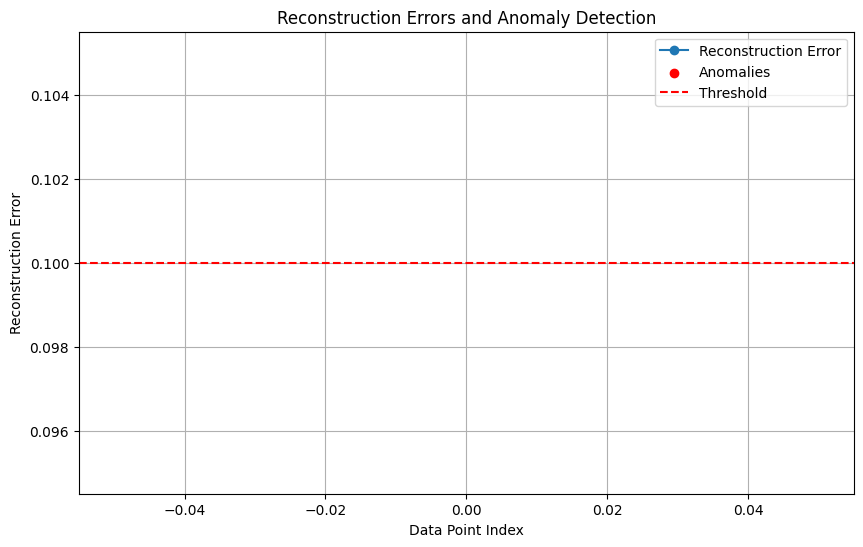

Number of anomalies detected: 0


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

# Simulating power quality data (voltage, current, frequency, etc.)
np.random.seed(42)
data = {
    'Voltage': np.random.normal(230, 5, 1000),  # Voltage (V)
    'Current': np.random.normal(10, 1, 1000),   # Current (A)
    'Frequency': np.random.normal(50, 0.2, 1000),  # Frequency (Hz)
    'THD': np.random.normal(2, 0.5, 1000),      # Total Harmonic Distortion (%)
    'Power_Factor': np.random.normal(0.95, 0.02, 1000) # Power Factor
}

# Creating a DataFrame
df = pd.DataFrame(data)

# Feature Extraction: Calculating apparent, real, and reactive power
df['Apparent_Power'] = df['Voltage'] * df['Current']
df['Real_Power'] = df['Apparent_Power'] * df['Power_Factor']
df['Reactive_Power'] = np.sqrt(df['Apparent_Power']**2 - df['Real_Power']**2)

# Data Preprocessing: Scaling the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Building an Autoencoder model for anomaly detection
autoencoder = Sequential([
    Dense(32, activation='relu', input_shape=(scaled_data.shape[1],)),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(16, activation='relu'),
    Dense(32, activation='relu'),
    Dense(scaled_data.shape[1], activation='linear')
])

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mse')

# Training the autoencoder
autoencoder.fit(scaled_data, scaled_data, epochs=50, batch_size=32, validation_split=0.2)

# Simulate real-time new data (50 points) for monitoring
new_data = np.random.normal(size=(50, scaled_data.shape[1]))

# Predict using the trained autoencoder
reconstructed_data = autoencoder.predict(new_data)

# Calculate reconstruction error for each data point
reconstruction_errors = np.mean(np.abs(new_data - reconstructed_data), axis=1)

# Set a threshold for anomaly detection
anomaly_threshold = 0.1

# Visualize the results
plt.figure(figsize=(10, 6))

# Plot reconstruction errors
plt.plot(reconstruction_errors, label='Reconstruction Error', marker='o')

# Highlight points where reconstruction error exceeds the threshold (anomalies)
anomalies = np.where(reconstruction_errors > anomaly_threshold)[0]
plt.scatter(anomalies, reconstruction_errors[anomalies], color='red', label='Anomalies')

# Plot threshold line
plt.axhline(y=anomaly_threshold, color='r', linestyle='--', label='Threshold')

plt.title('Reconstruction Errors and Anomaly Detection')
plt.xlabel('Data Point Index')
plt.ylabel('Reconstruction Error')
plt.legend()
plt.grid(True)
plt.show()

# Output the number of anomalies detected
print(f"Number of anomalies detected: {len(anomalies)}")
